In [1]:
import tensorflow as tf
import os

In [2]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.999):
            print("\n¡Alcanzó el 96.9% de precisión, de modo que se cancela el entrenamiento!")
            self.model.stop_training = True

In [3]:
callbacks = myCallback()

In [4]:
train_happy_dir = os.path.join('happy-or-sad/happy')
train_sad_dir = os.path.join('happy-or-sad/sad')


train_happy_name = os.listdir(train_happy_dir)
print(train_happy_name[:3])
train_sad_name = os.listdir(train_sad_dir)
print(train_sad_name[:3])


print('total training happy images:', len(os.listdir(train_happy_dir)))
print('total training sad images:', len(os.listdir(train_sad_dir)))

['happy1-00.png', 'happy1-01.png', 'happy1-02.png']
['sad1-00.png', 'sad1-01.png', 'sad1-02.png']
total training happy images: 40
total training sad images: 40


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

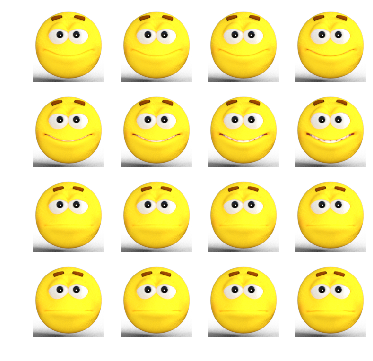

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 1.5, nrows * 1.5)
cantidad = 8
pic_index += cantidad
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_name[pic_index-cantidad:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_name[pic_index-cantidad:pic_index]]


for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0         
__________

In [9]:
from tensorflow.keras.optimizers import Adamax

model.compile(loss='binary_crossentropy',
              optimizer=Adamax(lr=0.0001),
              metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'happy-or-sad',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 80 images belonging to 2 classes.


In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=80,

      verbose=1)
#callbacks=[callbacks],

Instructions for updating:
Use tf.cast instead.
Epoch 1/80
1/1 [==============================] - 5s 5s/step - loss: 0.6952 - acc: 0.5000
Epoch 2/80
1/1 [==============================] - 5s 5s/step - loss: 0.9236 - acc: 0.5000
Epoch 3/80
1/1 [==============================] - 5s 5s/step - loss: 0.7057 - acc: 0.5000
Epoch 4/80
1/1 [==============================] - 5s 5s/step - loss: 0.6697 - acc: 0.5000
Epoch 5/80
1/1 [==============================] - 5s 5s/step - loss: 0.7114 - acc: 0.5000
Epoch 6/80
1/1 [==============================] - 5s 5s/step - loss: 0.7278 - acc: 0.5000
Epoch 7/80
1/1 [==============================] - 5s 5s/step - loss: 0.7085 - acc: 0.5000
Epoch 8/80
1/1 [==============================] - 5s 5s/step - loss: 0.6792 - acc: 0.5000
Epoch 9/80
1/1 [==============================] - 5s 5s/step - loss: 0.6578 - acc: 0.5000
Epoch 10/80
1/1 [==============================] - 5s 5s/step - loss: 0.6515 - acc: 1.0000
Epoch 11/80
1/1 [==============================] - 